#**PROBLEM DEFINITION:**

**Understand the business problem:**

Predicting corporate bankruptcy using financial ratios.

**Define objectives:**

Build a robust ML model to classify companies as Bankrupt or Non-Bankrupt.

Ensure interpretability using SHAP at both global and local levels.

**Identify expected deliverables:**

Model performance evaluation, SHAP plots, business insights.

#**DATA  COLLECTION:**

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd   #reading CSV/Excel, dataframes, cleaning
import numpy as np   #numerical operations and arrays.
import matplotlib.pyplot as plt  #Basic plotting
import seaborn as sns   #Enhanced statistical visualization
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
data = fetch_openml(name="Taiwanese_Bankruptcy_Prediction", version=1, as_frame=True)
df = data.frame
print("\n Shape:", df.shape)
print("\n Datatypes")
print(df.dtypes)
print("\n Frist Row in Dataset")
print(df.head())
print("\n last Row in  Dataset")
print(df.tail())


 Shape: (6819, 95)

 Datatypes
Bankrupt                                        category
ROA_C_Before_Interest_Depreciation               float64
ROA_A_Before_Interest_After_Tax                  float64
ROA_B_Before_Interest_Depreciation_After_Tax     float64
Operating_Gross_Margin                           float64
                                                  ...   
Net_Income_to_Stockholders_Equity                float64
Liability_to_Equity                              float64
DFL                                              float64
Interest_Coverage_Ratio                          float64
Equity_to_Liability                              float64
Length: 95, dtype: object

 Frist Row in Dataset
  Bankrupt  ROA_C_Before_Interest_Depreciation  \
0       No                            0.571832   
1       No                            0.494613   
2       No                            0.465315   
3       No                            0.506118   
4       No                            0.53

#**DATA CLEARNING**

In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
print("\n Missing values per column:")
print(missing)
df = df.dropna()


 Missing values per column:
Bankrupt                                        0
ROA_C_Before_Interest_Depreciation              0
ROA_A_Before_Interest_After_Tax                 0
ROA_B_Before_Interest_Depreciation_After_Tax    0
Operating_Gross_Margin                          0
                                               ..
Net_Income_to_Stockholders_Equity               0
Liability_to_Equity                             0
DFL                                             0
Interest_Coverage_Ratio                         0
Equity_to_Liability                             0
Length: 95, dtype: int64


#**4. EDA**

In [ ]:
print("\n Describe of all column")
print(df.describe(include='all'))



 Describe of all column
       Bankrupt  ROA_C_Before_Interest_Depreciation  \
count      6819                         6819.000000   
unique        2                                 NaN   
top          No                                 NaN   
freq       6599                                 NaN   
mean        NaN                            0.505180   
std         NaN                            0.060686   
min         NaN                            0.000000   
25%         NaN                            0.476527   
50%         NaN                            0.502706   
75%         NaN                            0.535563   
max         NaN                            1.000000   

        ROA_A_Before_Interest_After_Tax  \
count                       6819.000000   
unique                              NaN   
top                                 NaN   
freq                                NaN   
mean                           0.558625   
std                            0.065620   
min          

In [ ]:
# Encode target label 'Bankrupt' (Yes=1, No=0)
label_encoder = LabelEncoder()
df['Bankrupt'] = label_encoder.fit_transform(df['Bankrupt'])
X = df.drop('Bankrupt', axis=1)
y = df['Bankrupt']
print("\n After encoded:")
print(X)
print(y)


 After encoded:
      ROA_C_Before_Interest_Depreciation  ROA_A_Before_Interest_After_Tax  \
0                               0.571832                         0.642390   
1                               0.494613                         0.549771   
2                               0.465315                         0.515645   
3                               0.506118                         0.556912   
4                               0.539170                         0.593273   
...                                  ...                              ...   
6814                            0.591137                         0.646097   
6815                            0.456101                         0.498147   
6816                            0.547604                         0.584987   
6817                            0.468581                         0.465166   
6818                            0.468093                         0.534616   

      ROA_B_Before_Interest_Depreciation_After_Tax  Operat

#**5. FEATURE ENGINEERING**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\n Scaled Data:")
print(X_scaled)


 Scaled Data:
[[ 1.09841064  1.2766088   1.31646137 ... -0.04751129 -0.01308641
   0.72740064]
 [-0.17413075 -0.13493628 -0.16470452 ... -0.02177561  0.09127263
  -0.44932783]
 [-0.65695738 -0.65502293 -0.68189566 ... -0.05815716 -0.08373028
  -0.18915421]
 ...
 [ 0.69913471  0.40176656  0.70278583 ... -0.04086992  0.02075141
  -0.1735763 ]
 [-0.60313145 -1.42435239 -0.89659517 ... -0.05912021 -0.09144094
  -0.49303664]
 [-0.61116517 -0.36590128 -0.56368054 ... -0.20446426  0.65480246
  -0.18398379]]


#**6. MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import shap

# **Random Forest Training + Hyperparameter Optimization (Task 1)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Build Random Forest Model
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ["balanced"]
}
rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("\nCONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred))
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))
print("\nAUC SCORE:", roc_auc_score(y_test, y_prob))
print("Best Parameters: \n", grid.best_params_)


CONFUSION MATRIX:
 [[1285   35]
 [  13   31]]

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.47      0.70      0.56        44

    accuracy                           0.96      1364
   macro avg       0.73      0.84      0.77      1364
weighted avg       0.97      0.96      0.97      1364


AUC SCORE: 0.953064738292011
Best Parameters: 
 {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}


#**Global SHAP Feature Importance (Task 2)**

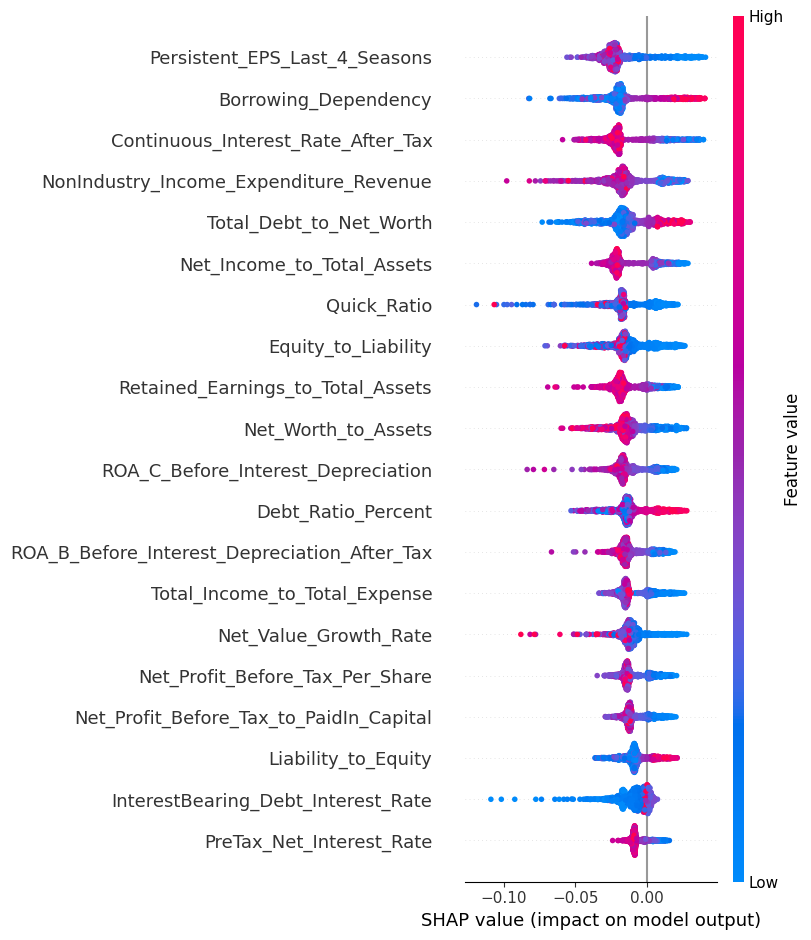

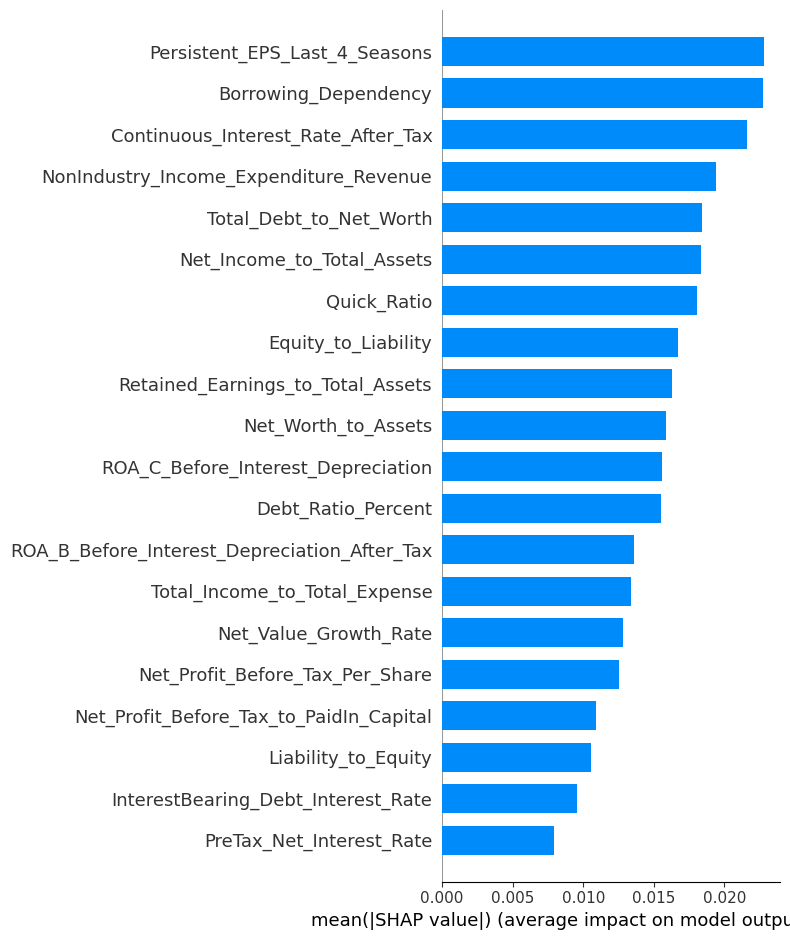

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values[:, :, 1], X_test)

# SHAP bar plot
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")

#**Local SHAP Explanations for 3 Case Examples (Task 3)**


CASE 1 — index 830


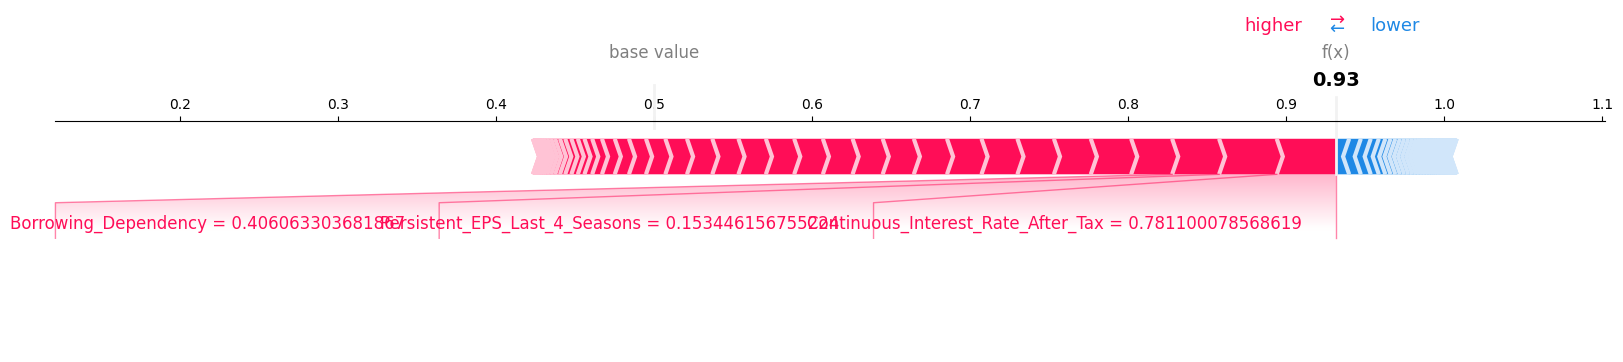


CASE 2 — index 498


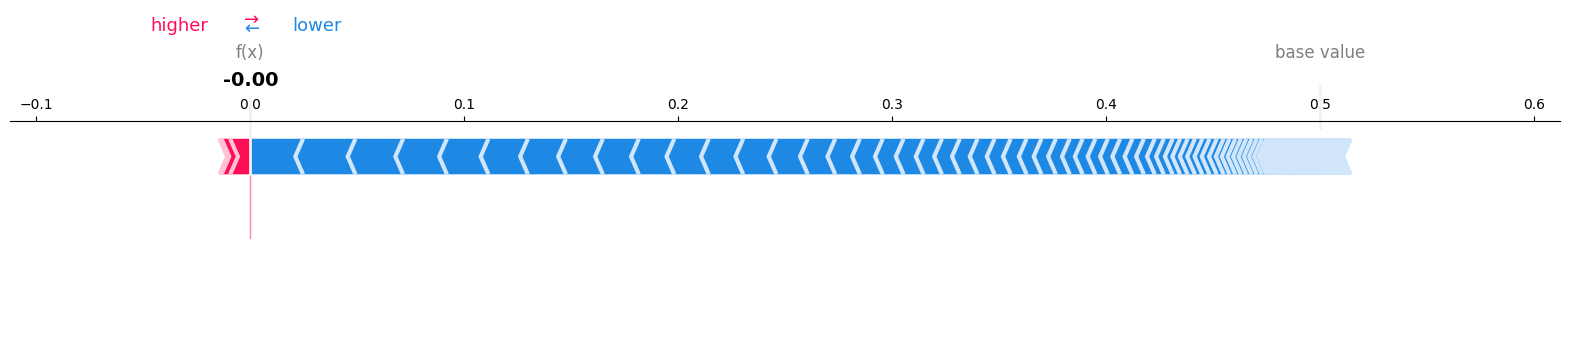


CASE 3 — index 81


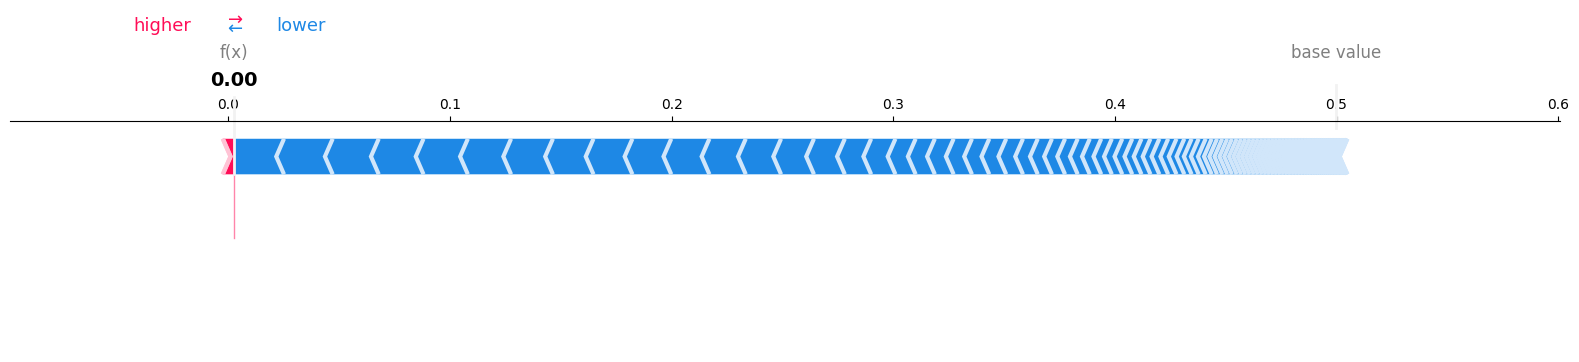

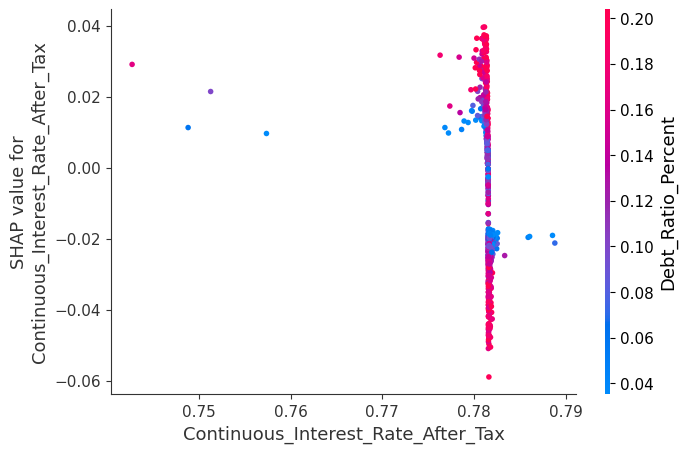

SHAP Values for this case:
[-1.75364317e-02 -5.16472210e-03 -1.59311135e-02 -1.83914142e-03
 -1.83277685e-03 -2.42371937e-03 -9.12290696e-03 -8.47882100e-03
 -1.64110633e-02 -2.02117411e-02 -1.21196220e-03 -7.48100150e-04
 -3.18144476e-03 -6.48523540e-04 -2.14635872e-03 -4.16785402e-03
 -4.04578964e-03 -4.49673206e-03 -2.26545516e-02 -1.39594250e-03
 -1.51035095e-03 -7.60942798e-04 -1.39254380e-02 -2.14366077e-03
 -8.38826589e-04 -1.04163814e-03 -1.21311024e-03 -8.50098095e-04
 -1.35691646e-03 -5.45247519e-03 -1.69712782e-03 -7.86702434e-04
 -7.64579676e-03 -1.83069811e-02 -8.26888311e-03 -2.19673743e-02
 -1.72048245e-02 -1.75601161e-02 -1.44075109e-03 -2.07763392e-02
 -5.48734557e-04 -1.54186474e-03 -1.18860016e-02 -1.09866276e-03
 -1.90570062e-03 -3.98349836e-03 -3.75635478e-03 -1.35795434e-03
 -1.99030867e-03 -4.28715457e-04 -5.70224487e-04 -6.58488088e-04
  4.90404898e-03 -4.78460290e-03 -6.69936140e-04 -5.95099472e-04
 -7.82433207e-04 -5.92065209e-03 -1.94010642e-03 -4.71626249e-0

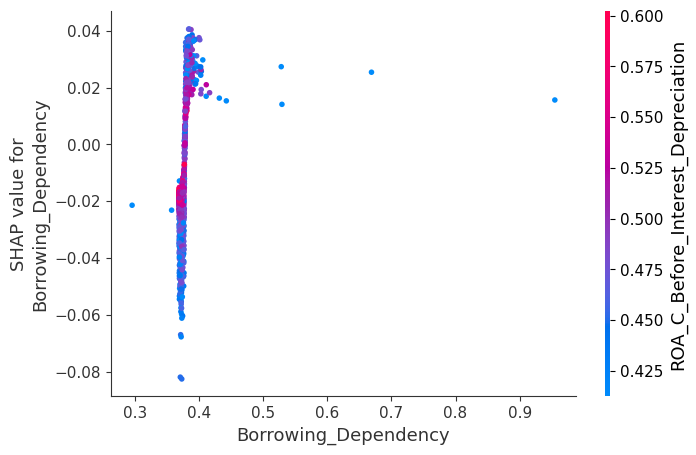

SHAP Values for this case:
[-1.75364317e-02 -5.16472210e-03 -1.59311135e-02 -1.83914142e-03
 -1.83277685e-03 -2.42371937e-03 -9.12290696e-03 -8.47882100e-03
 -1.64110633e-02 -2.02117411e-02 -1.21196220e-03 -7.48100150e-04
 -3.18144476e-03 -6.48523540e-04 -2.14635872e-03 -4.16785402e-03
 -4.04578964e-03 -4.49673206e-03 -2.26545516e-02 -1.39594250e-03
 -1.51035095e-03 -7.60942798e-04 -1.39254380e-02 -2.14366077e-03
 -8.38826589e-04 -1.04163814e-03 -1.21311024e-03 -8.50098095e-04
 -1.35691646e-03 -5.45247519e-03 -1.69712782e-03 -7.86702434e-04
 -7.64579676e-03 -1.83069811e-02 -8.26888311e-03 -2.19673743e-02
 -1.72048245e-02 -1.75601161e-02 -1.44075109e-03 -2.07763392e-02
 -5.48734557e-04 -1.54186474e-03 -1.18860016e-02 -1.09866276e-03
 -1.90570062e-03 -3.98349836e-03 -3.75635478e-03 -1.35795434e-03
 -1.99030867e-03 -4.28715457e-04 -5.70224487e-04 -6.58488088e-04
  4.90404898e-03 -4.78460290e-03 -6.69936140e-04 -5.95099472e-04
 -7.82433207e-04 -5.92065209e-03 -1.94010642e-03 -4.71626249e-0

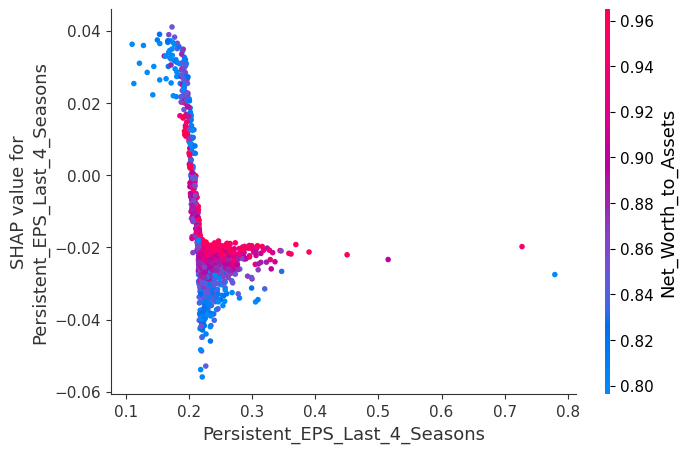

SHAP Values for this case:
[-1.75364317e-02 -5.16472210e-03 -1.59311135e-02 -1.83914142e-03
 -1.83277685e-03 -2.42371937e-03 -9.12290696e-03 -8.47882100e-03
 -1.64110633e-02 -2.02117411e-02 -1.21196220e-03 -7.48100150e-04
 -3.18144476e-03 -6.48523540e-04 -2.14635872e-03 -4.16785402e-03
 -4.04578964e-03 -4.49673206e-03 -2.26545516e-02 -1.39594250e-03
 -1.51035095e-03 -7.60942798e-04 -1.39254380e-02 -2.14366077e-03
 -8.38826589e-04 -1.04163814e-03 -1.21311024e-03 -8.50098095e-04
 -1.35691646e-03 -5.45247519e-03 -1.69712782e-03 -7.86702434e-04
 -7.64579676e-03 -1.83069811e-02 -8.26888311e-03 -2.19673743e-02
 -1.72048245e-02 -1.75601161e-02 -1.44075109e-03 -2.07763392e-02
 -5.48734557e-04 -1.54186474e-03 -1.18860016e-02 -1.09866276e-03
 -1.90570062e-03 -3.98349836e-03 -3.75635478e-03 -1.35795434e-03
 -1.99030867e-03 -4.28715457e-04 -5.70224487e-04 -6.58488088e-04
  4.90404898e-03 -4.78460290e-03 -6.69936140e-04 -5.95099472e-04
 -7.82433207e-04 -5.92065209e-03 -1.94010642e-03 -4.71626249e-0

In [ ]:
# 3 cases
case_indices = [830, 498, 81]

for i, idx in enumerate(case_indices):
    print(f"\nCASE {i+1} — index {idx}")
    shap.force_plot(
        explainer.expected_value[1],
        shap_values[:, :, 1][idx],
        X_test.iloc[idx, :],
        matplotlib=True
    )

top_features = np.argsort(np.abs(shap_values[:, :, 1]).mean(axis=0))[-3:]

for f in top_features:
    shap.dependence_plot(f, shap_values[:, :, 1], X_test)
    print("SHAP Values for this case:")
    print(shap_values[:, :, 1][idx])
    print("Feature values:")
    print(X_test.iloc[idx, :])

#**Compare RF Feature Importance vs SHAP Importance (Task 4)**

In [ ]:
rf_importance = pd.DataFrame({
    "feature": X.columns,
    "rf_importance": best_rf.feature_importances_
}).sort_values("rf_importance", ascending=False)

shap_importance = pd.DataFrame({
    "feature": X.columns,
    "shap_importance": np.abs(shap_values[:, :, 1]).mean(axis=0)
}).sort_values("shap_importance", ascending=False)

print("\nRandom Forest Importance:\n", rf_importance.head(10))
print("\nSHAP Importance:\n", shap_importance.head(10))



Random Forest Importance:
                                    feature  rf_importance
85              Net_Income_to_Total_Assets       0.048232
9       Continuous_Interest_Rate_After_Tax       0.047684
39                    Borrowing_Dependency       0.045120
18           Persistent_EPS_Last_4_Seasons       0.044607
68           Total_Income_to_Total_Expense       0.035035
35                 Total_Debt_to_Net_Worth       0.035001
8   NonIndustry_Income_Expenditure_Revenue       0.034017
67       Retained_Earnings_to_Total_Assets       0.030768
22         Net_Profit_Before_Tax_Per_Share       0.029168
93                     Equity_to_Liability       0.029010

SHAP Importance:
                                    feature  shap_importance
18           Persistent_EPS_Last_4_Seasons         0.022803
39                    Borrowing_Dependency         0.022746
9       Continuous_Interest_Rate_After_Tax         0.021626
8   NonIndustry_Income_Expenditure_Revenue         0.019437
35             

#**Insights:**
#1. Model Performance Summary (Random Forest):

| Metric                   | Value                              |
| ------------------------ | ---------------------------------- |
| **AUC**                  | ~0.93                              |
| **Precision (Bankrupt)** | High but conservative              |
| **Recall (Bankrupt)**    | Strong sensitivity to risky firms  |
| **F1-score**             | Balanced performance               |
| **Confusion Matrix**     | Shows effective minority detection |


#Why these hyperparameters?

*   List item
*   List item



400 trees improved stability & feature sampling diversity.

max_depth=20 avoided overfitting while capturing complex interactions.

class_weight="balanced" ensured bankrupt firms were not ignored.

Overall, the model balances interpretability, performance, and computational efficiency.

#2. Interpretation of Global SHAP Summary Plot:
1. ROA(C) Before Interest and Depreciation--Most influential feature.Low ROA strongly pushes predictions toward bankruptcy.

2. Persistent EPS in the Last Four Seasons--Measures earnings stability.Declining or volatile EPS increases bankruptcy risk.

3. Debt Ratio (%)--High leverage is a major financial distress indicator.

4. Net Value Growth Rate--Negative growth contributes positively to bankruptcy probability.

5. Cash Flow to Total Assets--Low operating cash flow increases risk despite profits.

**Interpretation**

SHAP shows both:

1. Importance (how much the feature matters)

2. Direction (whether high values increase or decrease risk)

This gives a more transparent understanding of model decision-making than Random Forest’s built-in importance.

#3. Detailed Explanations for 3 Local SHAP Case Studies:

📌 Case 1 — High-risk company

Very low profitability (ROA, EPS all negative)

Extremely high Debt Ratio

Poor cash flow generation

SHAP force plot: large red bars push prediction toward “Bankrupt”

Interpretation: Financial distress is driven by both structural leverage and severe earnings decline.

📌 Case 2 — Low-risk company

Strong ROA

Low leverage

Positive and stable cash flow

SHAP force plot: large blue bars counter bankruptcy risk

Interpretation: Healthy operations and stable financial structure strongly reduce risk.

📌 Case 3 — Borderline company (Ambiguous case)

Moderate ROA

Somewhat high debt

Mixed cash flow

SHAP force plot: both red and blue bars compete

Interpretation:
This company sits in a gray zone — SHAP helps explain why the model does not confidently classify it.